In [1]:
import pandas as pd

In [2]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

- date — дата наблюдения;
- cid — идентификатор посетителя;
- transactions — количество совершённых целевых действий (транзакций);
- revenue — сумма покупки;
- group — группа (тестовая — А, контрольная — B).

In [3]:
sample_a['date']=pd.to_datetime(sample_a['date'], format='%Y-%m-%d')
sample_b['date']=pd.to_datetime(sample_b['date'], format='%Y-%m-%d')

In [4]:
df_join=pd.concat([sample_a, sample_b],
                  axis=0,
                  join='outer',
                  ignore_index=True
                    )

In [5]:
df_join

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A
...,...,...,...,...,...
122949,2020-11-23,9.965675e+08,0,0,B
122950,2020-11-23,9.970803e+07,0,0,B
122951,2020-11-23,9.984814e+08,0,0,B
122952,2020-11-23,9.991118e+08,0,0,B


In [6]:
df_join=df_join.groupby(['date', 'group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue': 'sum'
}).reset_index()

In [7]:
df_join[(df_join['date']=='2020-11-08') & (df_join['group']=='A')]['cid']

4    3354
Name: cid, dtype: int64

In [8]:
df_join[(df_join['date']=='2020-11-08') & (df_join['group']=='A')]['transactions']

4    25
Name: transactions, dtype: int64

In [9]:
df_join[(df_join['date']=='2020-11-08') & (df_join['group']=='A')]['revenue']

4    846051
Name: revenue, dtype: int64

In [10]:
pd.options.mode.chained_assignment = None  # default='warn'

In [11]:

sample_a_agg = sample_a.groupby('date').agg({'cid': 'count', 'transactions': 'sum', 'revenue': 'sum'})
sample_b_agg = sample_b.groupby('date').agg({'cid': 'count', 'transactions': 'sum', 'revenue': 'sum'})

print((sample_a_agg['transactions'].cumsum() / sample_a_agg['cid'].cumsum() * 100).mean())
print((sample_b_agg['transactions'].cumsum() / sample_b_agg['cid'].cumsum() * 100).mean())

0.7127554606160045
0.7621783890588011


In [12]:
df_join

,date,group,cid,transactions,revenue
0,2020-11-06,A,2576,16,1577279
1,2020-11-06,B,2499,19,996645
2,2020-11-07,A,2704,23,1721886
3,2020-11-07,B,2804,19,555499
4,2020-11-08,A,3354,25,846051
5,2020-11-08,B,3291,24,3044842
6,2020-11-09,A,3234,18,708830
7,2020-11-09,B,3062,25,1285836
8,2020-11-10,A,3022,29,826984
9,2020-11-10,B,3072,30,2414726


In [13]:
df_join['con_of_buy']=df_join['transactions'] / df_join['cid'] * 100

In [14]:
df_join

,date,group,cid,transactions,revenue,con_of_buy
0,2020-11-06,A,2576,16,1577279,0.621118
1,2020-11-06,B,2499,19,996645,0.760304
2,2020-11-07,A,2704,23,1721886,0.850592
3,2020-11-07,B,2804,19,555499,0.677603
4,2020-11-08,A,3354,25,846051,0.745379
5,2020-11-08,B,3291,24,3044842,0.729262
6,2020-11-09,A,3234,18,708830,0.556586
7,2020-11-09,B,3062,25,1285836,0.816460
8,2020-11-10,A,3022,29,826984,0.959629
9,2020-11-10,B,3072,30,2414726,0.976562


In [15]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          36 non-null     datetime64[ns]
 1   group         36 non-null     object        
 2   cid           36 non-null     int64         
 3   transactions  36 non-null     int64         
 4   revenue       36 non-null     int64         
 5   con_of_buy    36 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.8+ KB


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df_join['con_cum']=df_join.groupby(['group'])['con_of_buy'].cumsum()

In [18]:
df_join['mean_check']=df_join['revenue']/df_join['transactions']

In [19]:
df_join['mean_check_cum']=df_join.groupby(['group'])['mean_check'].cumsum()

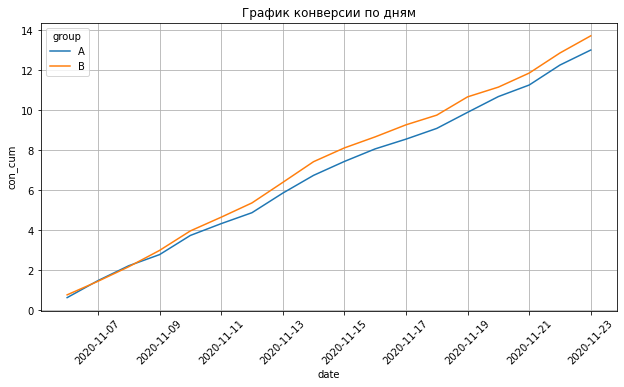

In [20]:
# график изменения ежедневной конверсии в каждой группе по времени

# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=df_join,
    x='date',
    y='con_cum',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

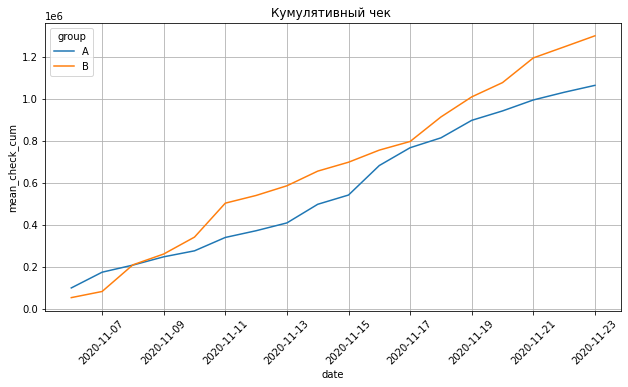

In [21]:
# график изменения ежедневной конверсии в каждой группе по времени

# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=df_join,
    x='date',
    y='mean_check_cum',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('Кумулятивный чек ')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

Н0: конверсия в группе А и В равны

Н1: конверсия в группе A меньше, чем в группе В

In [22]:
alpha=0.1 

In [23]:
from statsmodels.stats.proportion import proportions_ztest

In [24]:
df_join

,date,group,cid,transactions,revenue,con_of_buy,con_cum,mean_check,mean_check_cum
0,2020-11-06,A,2576,16,1577279,0.621118,0.621118,98579.937500,9.857994e+04
1,2020-11-06,B,2499,19,996645,0.760304,0.760304,52455.000000,5.245500e+04
2,2020-11-07,A,2704,23,1721886,0.850592,1.471710,74864.608696,1.734445e+05
3,2020-11-07,B,2804,19,555499,0.677603,1.437908,29236.789474,8.169179e+04
4,2020-11-08,A,3354,25,846051,0.745379,2.217088,33842.040000,2.072866e+05
5,2020-11-08,B,3291,24,3044842,0.729262,2.167169,126868.416667,2.085602e+05
6,2020-11-09,A,3234,18,708830,0.556586,2.773675,39379.444444,2.466660e+05
7,2020-11-09,B,3062,25,1285836,0.816460,2.983629,51433.440000,2.599936e+05
8,2020-11-10,A,3022,29,826984,0.959629,3.733304,28516.689655,2.751827e+05
9,2020-11-10,B,3072,30,2414726,0.976562,3.960191,80490.866667,3.404845e+05


In [28]:
converted_piv=df_join.groupby(['group']).agg({'transactions': 'sum', 'cid': 'sum'})
converted_piv

,transactions,cid
group,,
A,441,61571
B,463,61383


In [29]:
_, p_value = proportions_ztest(
    count=converted_piv['transactions'],
    nobs=converted_piv['cid'],
    alternative='smaller'
)

if p_value < alpha:
    print ('Отклоняем нулевую гипотезу')
else:
    print ('Принимаем нулевую гипотезу')

Принимаем нулевую гипотезу


In [30]:
from scipy.stats import shapiro

Н0: средний чек имеет нормальное распределение

Н1: средний чек имеет распределение, отличное от нормального

In [40]:
shapiro_result_a=shapiro(df_join[df_join['group'] == 'A']['mean_check'])
shapiro_result_b=shapiro(df_join[df_join['group'] == 'B']['mean_check'])

In [41]:
if shapiro_result_a.pvalue < alpha:
    print ('Отклоняем нулевую гипотезу')
else:
    print ('Принимаем нулевую гипотезу')

Отклоняем нулевую гипотезу


In [42]:
if shapiro_result_b.pvalue < alpha:
    print ('Отклоняем нулевую гипотезу')
else:
    print ('Принимаем нулевую гипотезу')

Отклоняем нулевую гипотезу


In [43]:
from scipy.stats import mannwhitneyu

In [51]:
_, p_value=mannwhitneyu(x=df_join[df_join['group'] == 'A']['mean_check'], 
                        y=df_join[df_join['group'] == 'B']['mean_check'],
                        alternative='less')

In [52]:
if p_value < alpha:
    print ('Отклоняем нулевую гипотезу')
else:
    print ('Принимаем нулевую гипотезу')

Отклоняем нулевую гипотезу


In [64]:
# начальные значения
n=64 #размер выборки
sigma = 2.4 #истинное стандартное отклонение
x = 12.35 # среднее значение выборки
gamma = 0.9 # уровень надежности
alpha = 1- gamma # уровень значимости

In [65]:
from scipy.stats import norm
z_crit = -norm.ppf(alpha/2) # z критическое

In [66]:
z_crit=round(z_crit, 2)

In [68]:
eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x - eps # левая (нижняя) граница
upper_bound = x + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound, 2), round(upper_bound, 2)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (11.86, 12.84)


In [69]:
n=25
k=n-1
x_mean=3540
x_std=1150
gamma=0.9
alpha=1-gamma


In [70]:
from scipy.stats import t
t_crit = -t.ppf(alpha/2, k) # t-критическое

In [71]:
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (3146, 3934)


In [5]:
from scipy.stats import norm


In [41]:
def proportions_conf_interval(n, x_p, gamma=0.95):   
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round((lower_bound*100), 2), round((upper_bound*100 ), 2)

In [34]:
def diff_proportions_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round((lower_bound * 100), 2), round((upper_bound ), 2)

In [42]:
positiv = proportions_conf_interval(n=189, x_p=132/189, gamma=0.9)
positiv

(64.35, 75.33)

In [43]:
negativ = proportions_conf_interval(n=189, x_p=(189-132)/189, gamma=0.9)
negativ

(24.67, 35.65)

In [44]:
round(132/189, 3)

0.698

In [46]:
def diff_proportions_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

In [48]:
n=[1000, 1000]
xp=[45/1000, 50/1000]
diff_interval=diff_proportions_conf_interval(n, xp)

In [49]:
diff_interval

(-1.36, 2.36)